# Machine learning for data analysis


# Week 1

In [4]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics

In [5]:
#load dataset
file=pd.read_csv('Alcohol.csv', sep=r'\s*,\s*',header=0, encoding='ascii', engine='python')
#rename columns
df=file[['S2AQ21A','S1Q6A','S3AQ3C1','S3BQ1A6']]
df=df.rename(columns={'S2AQ21A':'drinks','S1Q6A':'school','S3AQ3C1':'cigarettes','S3BQ1A6':'drugs'})
#clean data
df=df.dropna()
df.drop(df.index[(df["cigarettes"] == 99)|(df["drinks"] == 99)|(df["drugs"] == 9)],axis=0,inplace=True)

In [6]:
df.describe()


,drinks,school,cigarettes,drugs
count,16325.000000,16325.000000,16325.000000,16325.000000
mean,4.595345,9.374456,15.691516,1.885942
std,2.843686,2.287153,12.469562,0.317892
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,8.000000,6.000000,2.000000
50%,4.000000,10.000000,15.000000,2.000000
75%,6.000000,11.000000,20.000000,2.000000
max,10.000000,14.000000,98.000000,2.000000


In [7]:
#modelling and prediction
# RESPONSE     S3BQ1A6 EVER USED COCAINE OR CRACK
#S2AQ21A HOW OFTEN DRANK ANY ALCOHOL DURING PERIOD OF HEAVIEST DRINKING
#S1Q6A HIGHEST GRADE OR YEAR OF SCHOOL COMPLETED
#S3AQ3C1 USUAL QUANTITY WHEN SMOKED CIGARETTES


predictors=df[['drinks','school','cigarettes']]
target=df.drugs

In [8]:
pred_train,pred_test,tar_train,tar_test=train_test_split(predictors,target,test_size=0.4)
print(pred_train.shape,pred_test.shape,tar_train.shape,tar_test.shape)


(9795, 3) (6530, 3) (9795,) (6530,)


In [9]:
#Build model on training dataset
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

In [10]:
predictions=classifier.predict(pred_test)

In [11]:
sklearn.metrics.confusion_matrix(tar_test,predictions)


array([[  24,  747],
       [ 166, 5593]])

In [12]:
print('% of right prediction')
sklearn.metrics.accuracy_score(tar_test,predictions)

% of right prediction


0.8601837672281777

In [3]:
print('the model predict the result with 0.873% of precision thus we can say that the model works well and can classify potential people with drugs problems appropriately.')

the model predict the result with 0.873% of precision thus we can say that the model works well and can classify potential people with drugs problems appropriately.


In [13]:
## Display decision Tree
#from sklearn import tree
#from io import StringIO
#from IPython.display import Image
#out=StringIO()
#tree.export_graphviz(classifier,out_file=out)
#import pydotplus
#graph=pydotplus.graph_from_dot_data(out.getvalue())
#Image(graph.create_png())

## Week 2

In [2]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import os 
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
#feature importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

In [10]:
#load dataset
# RESPONSE     S3BQ1A6 EVER USED COCAINE OR CRACK
#S2AQ21A HOW OFTEN DRANK ANY ALCOHOL DURING PERIOD OF HEAVIEST DRINKING
#S1Q6A HIGHEST GRADE OR YEAR OF SCHOOL COMPLETED
#S3AQ3C1 USUAL QUANTITY WHEN SMOKED CIGARETTES
#S10Q1B60 EVER TROUBLE YOU OR CAUSE PROBLEMS AT WORK/SCHOOL OR WITH FAMILY/OTHER PEOPLE


file=pd.read_csv('Alcohol.csv', sep=r'\s*,\s*',header=0, encoding='ascii', engine='python')



In [11]:
#rename columns
df=file[['S2AQ21A','S1Q6A','S3AQ3C1','S3BQ1A6','S10Q1B60']]
df=df.rename(columns={'S2AQ21A':'drinks','S1Q6A':'school','S3AQ3C1':'cigarettes','S3BQ1A6':'drugs','S10Q1B60':'trouble'})

In [12]:
#clean data
df=df.dropna()
df.drop(df.index[(df["cigarettes"] == 99)|(df["drinks"] == 99)|(df["trouble"] == 9)|(df["drugs"] == 9)],axis=0,inplace=True)

In [13]:
#replace 2 with 0
df["drugs"].replace({2: 0}, inplace=True)
df["trouble"].replace({2: 0}, inplace=True)


In [14]:
#predictors and target
predictors=df[['drinks','school','cigarettes','trouble']]
targets=df.drugs

In [15]:
pred_train,pred_test,tar_train,tar_test=train_test_split(predictors,targets,test_size=0.4)

In [16]:
#build a model on training dataset
from sklearn.ensemble import RandomForestClassifier
# n_estimators= number of trees
classifier=RandomForestClassifier(n_estimators=25)
classifier=classifier.fit(pred_train,tar_train)

In [17]:
predictions=classifier.predict(pred_test)

In [21]:
print('confusion matrix')
sklearn.metrics.confusion_matrix(tar_test,predictions)

confusion matrix


array([[5512,   69],
       [ 762,   15]])

In [20]:
print('accurancy score')
sklearn.metrics.accuracy_score(tar_test,predictions)

accurancy score


0.8692985215476565

In [23]:
#fit an Extra Trees model to the data
model=ExtraTreesClassifier()
model.fit(pred_train,tar_train)
print('relative importance of drinks,school,cigarettes,trouble as classifier')
print(model.feature_importances_)

relative importance of drinks,school,cigarettes,trouble as classifier
[0.2886429  0.22501858 0.44111264 0.04522589]


running a different number of trees and see the effect of that on the accurancy of the prediction


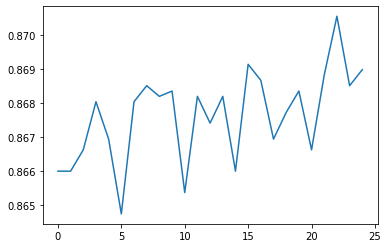

In [28]:
print('running a different number of trees and see the effect of that on the accurancy of the prediction')
trees=range(25)
accuracy=np.zeros(25)

for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx+1)
    classifier=classifier.fit(pred_train,tar_train)
    predictions=classifier.predict(pred_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(tar_test,predictions)
    
plt.cla()
plt.plot(trees,accuracy);

In [29]:
print('the accuracy is 0.8692985215476565 and the importance of each parameter is [0.2886429  0.22501858 0.44111264 0.04522589]. In the image is confronted the accuracy and the number of trees used')

the accuracy is 0.8692985215476565 and the importance of each parameter is [0.2886429  0.22501858 0.44111264 0.04522589]. In the image is confronted the accuracy and the number of trees used
